In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%precision 3
%matplotlib inline

## 1차원 이산형 확률변수 정의

### 이산형 vs 연속형
 - 이산형: 셀 수 있는 데이터
 - 연속형: 값들 사이에도 무수히 많은 값들이 존재가능한 데이터(셀 수 없음)
 
### 확률변수
 - 변수가 취할 수 있는 값과 그 값이 나오는 확률에 의해 정의된다.
 
### 이산형 확률변수 vs 연속형 확률변수
 - 이산형 확률변수: 확률변수로 취할 수 있는 값들이 셀 수 있는 데이터일때
 - 연속형 확률변수: 확률변수로 취할 수 있는 값들이 셀 수 없는 데이터일때

### 확률질량함수 (Probability Mass Function: PMF)

 - 확률변수 X = [x_set, f]가 취할 수 있는 값(x_set)에 대한 집합을 {x1, x2, x3,...}으로 가정하면, 확률변수 X가 xk라는 값을 취할 확률은
 $$P(X=x) = p_k(k=1,2,...)$$
 로 정의된다.
 
 - 확률은 변수가 취할 수 있는 값 x를 인수로 하는 함수이므로, 
 $$f(x) = P(X=x)$$
 로 표현할 수 있고, 이를 확률질량함수, 또는 확률함수라고 한다.

In [2]:
## 예시 불공정한 주사위

x_set = np.array([1, 2, 3, 4, 5, 6]) ## 확률변수 X가 취할 수 있는 값의 집합.
x_set

array([1, 2, 3, 4, 5, 6])

In [3]:
## 확률(질량)함수 (PMF)
def f(x): ## 확률변수 X가 취할수 있는 값에 대한 확률(질량)함수.
    if x in x_set:
        return x/21
    else:
        return 0

In [4]:
## 확률변수 X

X = [x_set, f] ## 확률변수(X) = [값의집합, 확률질량함수]
X

[array([1, 2, 3, 4, 5, 6]), <function __main__.f(x)>]

확률 $p_k = f(x_k)$

In [5]:
prob = np.array([f(x_k) for x_k in x_set])
prob

array([0.048, 0.095, 0.143, 0.19 , 0.238, 0.286])

$x_k$와 $p_k$의 대응식을 사전식으로 표현

In [7]:
dict(zip(x_set, prob))

{1: 0.048, 2: 0.095, 3: 0.143, 4: 0.190, 5: 0.238, 6: 0.286}

----

### 확률의 성질
 - 확률은 2가지 식을 만족하여야 한다.
   > - 확률이 절대적으로 0이상이어야 한다. $f(x_k) >= 0$
   > - 모든 확률을 더하면 1이 되어야 한다. $\sum_kf(x_k) = 1$

In [8]:
np.all(prob >= 0)

True

In [9]:
np.sum(prob)

1.000

---

### 누적분포함수 (Cumulative Distribution Function: CDF)

 - 확률함수 $P(X=x)$로 표현이 되지만, 누적분포함수는 $P(X<=x)$로 표현이 된다.
 - 즉, 확률변수 X가 x이하가 될 때의 확률을 반환하는 함수이다.
 - 확률(질량)함수는 소문자인 $f(x)$로 표현이 되고, 누적분포함수는 대문자인 $F(x)$로 표현이 된다.
 
 $$F(x) = P(X<=x) = \sum_{x_k<=x}f(x_k)$$

In [10]:
## 누적분포함수(CDF)

def F(x):
    return np.sum([f(x_k) for x_k in x_set if x_k <= x])

In [16]:
F(3)

0.286

---

### 확률변수(X)의 변환

 - 확률변수 X에 2를 곱하고 3을 더한 2X+3과 같은 연산을 하는것
 - 2X+3으로 변환이 되어도, 확률변수 X가 취할 수 있는 값들만이 변화될 뿐, 그에 따른 확률값은 그대로 유지되어 2X+3또한 확률변수가 된다.

In [17]:
y_set = np.array([2*x_k+3 for x_k in x_set])
prob = np.array([f(x_k) for x_k in x_set])
dict(zip(y_set, prob))

{5: 0.048, 7: 0.095, 9: 0.143, 11: 0.190, 13: 0.238, 15: 0.286}

---
---

## 1차원 이산형 확률변수 지표

### 1차원 이산형 확률변수의 지표

 - 1차원 데이터의 지표인 평균과 분산을 동일하게 1차원 확률변수에도 정의 가능하다.
  - 평균(Mean/Average) -> 기대값(Expectation)
  - 분산(Variance) -> 분산(Variance)

### 기대값 (Expectation, Expected Value)

 - 확률변수(X = [x_set, f])의 평균
 - 이상적인 기대값 계산 방법
  : 확률변수를 무제한으로 시행하여 얻어진 실현값의 평균
 - 이산형 확률변수의 평균(기대값)
  : 확률변수가 취할 수 있는 값과 그 확률의 곱의 총합으로 정의
  $$E(x) = \sum_{k}x_kf(x_k)$$
 - 기대값이 기호로 표현될 때는, $\mu$(뮤)나 $E(X)$라는 표기를 주로 사용한다.

In [18]:
## 불공정한 주사위의 기대값 계산.

np.sum([x_k * f(x_k) for x_k in x_set])

4.333

In [21]:
## 이상적인 기대값 계산 방법인, 무제한 시행을 통해서 얻은 실현값의 평균으로 계산 (100만번 시행)

sample = np.random.choice(x_set, int(1e6), p=prob)
sample.mean()

4.330

 - 정의한 기대값 계산 결과값과 이상적인 계산을 어림잡아 계산한 기대값이 거의 비슷하다.

#### 2X+3으로 변환한 확률변수 Y의 기대값  -> Y = 2X+3 = g(X)

 - 기대값은 $x_k$라는 값을 그대로 $2x_k+3$으로 치환한 다음 식으로 정의한다.
 
$$E(Y)=E(2X+3)=\sum_{k}(2x_k+3)f(x_k)$$

 - 더 일반화하면, 확률 변수 X가 변환된 함수 g(X)의 기대값은 다음 식으로 정의된다.
 
$$E(2X+3)=E(g(X))=\sum_{k}g(x_k)f(x_k)$$

In [22]:
def E(X, g=lambda x: x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

In [23]:
E(X)

4.333

In [28]:
E(X, g=lambda x: 2*x+3)

11.667

In [27]:
2*E(X)+3

11.667

#### 기대값의 선형성
 - a,b를 실수, X를 확률변수라 하면,
$$E(aX+b)=aE(X)+3$$
   가 성립한다

---

### 분산 (Variance)

 - 편차 제곱의 기대값으로 정의된다.
 
$$V(X)=\sum_{k}(x_k-\mu)^2f(x_k)$$

   $\mu$는 확률변수X의 기대값으로 E(X)이다.
 - 분산은 기호로 $\sigma$(시그마)를 사용하고, $\sigma^2$이나 V(X)로 흔히 표기한다.
 - $\sigma$는 확률변수 X의 표준편차를 나타낸다.

In [29]:
mean = E(X)
np.sum([(x_k-mean)**2*f(x_k) for x_k in x_set])

2.222

#### 변환된 확률변수의 분산

 - 2X+3으로 변환되어을때
 
$$V(2X+3)=\sum_{k}((2x_k+3)-E(2X+3))^2f(x_k)$$

 - g(X)로 변환되었을때
 
$$V(g(X))=\sum_{k}(g(x_k)-E(g(X))^2f(x_k)$$

In [30]:
def V(X, g=lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k)-mean)**2*f(x_k) for x_k in x_set])

In [31]:
V(X)

2.222

In [32]:
V(X, g=lambda x: 2*x+3)

8.889

#### 분산의 선형성

 - a,b를 실수, X를 확률변수라 하면,
 
 $$V(aX+b)=a^2V(X)$$
   가 성립한다.

In [33]:
2**2*V(X)

8.889

---

## 2차원 이산형 확률변수 정의 (X, Y)

#### 2차원 이산형 확률변수의 정의

 - 2차원 확률변수에서는 1차원 확률분포 2개 (X,Y)를 동시에 다룬다.
 - 각 확률변수(X,Y)가 취할 수 있는 값의 조합으로 이루어진 집합과 그 확률에 의해 정의된다.
 
#### 결합확률분포 (Joint Probability Distribution)
 - (X,Y)가 취할 수 있는 값의 조합으로 이루어진 집합을
 $$\{(x_i,y_j)|i=1,2,...;j=1,2,...\}$$
   라고 표현할 수 있으며, 각각 조합에 맞는 확률들은 다음과 같이 표현된다.
 $$P(X=x_i,Y=y_i)=p_{ij}(i=1,2,...;j=1,2,...)$$
   이와 같이 확률변수 (X,Y)의 움직임을 동시에 고려한 분포를 결합확률분포라 한다.

#### 결합확률분포 예시1

 - X는 불공정한 주사위 A와 B 2개의 눈을 더한 것, Y는 불공정한 주사위 A의 눈으로 가정한다.
 - X가 취할 수 있는 값의 집합 x_set = [2,3,4,5,6,7,8,9,10,11,12]
 - Y가 취할 수 있는 값의 집합 y_set = [1,2,3,4,5,6]
 - X=9, Y=4일 때의 확률은? A=4, B=5의 눈이 나올 확률이므로
 
 $$4/21*5/21=20/441$$
   이라고 계산할 수 있다.

### 결합확률함수 (Joint Probability Function)

 - $P(X=x,Y=y)=f_{XY}(x,y)$가 되는 함수 $f_{xy}(x,y)$를 결합확률함수라 한다.
 
#### 결합확률함수 예시(불공정 주사위 A,B기반 X=A+B, Y=A일때)



### 2차원 이산형 확률변수

 - 확률의 성질
 
 $$f_{XY}(x_i,y_j)>=0$$
 $$\sum_i\sum_jf_{XY}(x_i,y_j)=1$$

In [35]:
## 2차원 이산형 확률변수 X, Y (불공정 주사위)

x_set = np.arange(2,12+1)
y_set = np.arange(1,6+1)

In [36]:
## 결합확률함수

def f_XY(x, y):
    if 1<=y<=6 and 1<=(x-y)<=6:
        return y * (x-y) / 441
    else:
        return 0

In [37]:
## 2차원 확률변수(XY)

XY = [x_set, y_set, f_XY]
XY

[array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array([1, 2, 3, 4, 5, 6]),
 <function __main__.f_XY(x, y)>]

In [38]:
prob = np.array([
    [
        f_XY(x_i, y_j)
        for y_j in y_set
    ]
    for x_i in x_set
])

prob

array([[0.002, 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.005, 0.005, 0.   , 0.   , 0.   , 0.   ],
       [0.007, 0.009, 0.007, 0.   , 0.   , 0.   ],
       [0.009, 0.014, 0.014, 0.009, 0.   , 0.   ],
       [0.011, 0.018, 0.02 , 0.018, 0.011, 0.   ],
       [0.014, 0.023, 0.027, 0.027, 0.023, 0.014],
       [0.   , 0.027, 0.034, 0.036, 0.034, 0.027],
       [0.   , 0.   , 0.041, 0.045, 0.045, 0.041],
       [0.   , 0.   , 0.   , 0.054, 0.057, 0.054],
       [0.   , 0.   , 0.   , 0.   , 0.068, 0.068],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.082]])

 - 확률 분포 시각화 및 확률 성질 확인

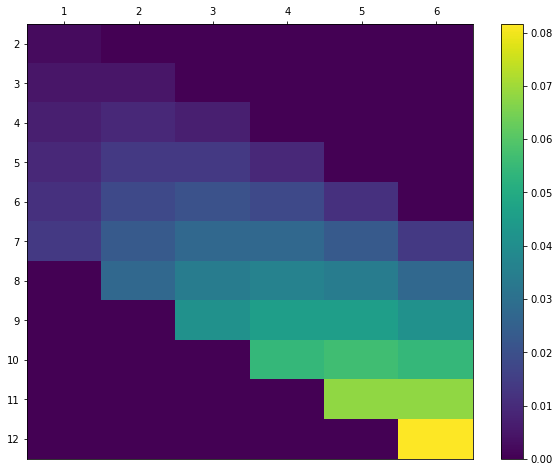

In [48]:
f, ax = plt.subplots(1, 1, figsize=(10, 8))

c = ax.pcolor(prob)
ax.set_xticks(np.arange(prob.shape[1])+0.5, minor=False)
ax.set_yticks(np.arange(prob.shape[0])+0.5, minor=False)
ax.set_xticklabels(np.arange(1,7), minor=False)
ax.set_yticklabels(np.arange(2,13), minor=False)

# y축을 내림차순의 숫자가 되도록 위 아래를 반전한다
ax.invert_yaxis()
# x축 눈금을 그래프 위쪽에 표시
ax.xaxis.tick_top()

f.colorbar(c, ax=ax)

plt.show()

In [49]:
np.all(prob >= 0)

True

In [50]:
np.sum(prob)

1.000

---

### 주변확률분포 (Marginal Probability Distribution)

 - 확률변수 (X,Y)가 결합확률분포에 의해 동시에 정의되었음에도 $(f_{XY}(x_i,y_j))$ 개별 확률변수 X의 확률분포 $(f_X(x))$만을 다시 살펴보아야할 때 이를 `주변확률분포`라 한다.
 - 주변확률분포는 아래 식을 통해 계산된다.
 $$f_X(x)=\sum_kf_{XY}(x,y_k)$$

In [51]:
## 주변확률분포(함수)

def f_X(x):
    return np.sum(
        [
            f_XY(x, y_k) 
            for y_k in y_set
        ]
    )

In [52]:
def f_Y(y):
    return np.sum(
        [
            f_XY(x_k, y)
            for x_k in x_set
        ]
    )

In [53]:
X = [x_set, f_X]
Y = [y_set, f_Y]

In [58]:
prob_x = np.array(
    [
        f_X(x_k) for x_k in x_set
    ]
)

prob_y = np.array(
    [
        f_Y(y_k) for y_k in y_set
    ]
)

prob_x

array([0.002, 0.009, 0.023, 0.045, 0.079, 0.127, 0.159, 0.172, 0.166,
       0.136, 0.082])

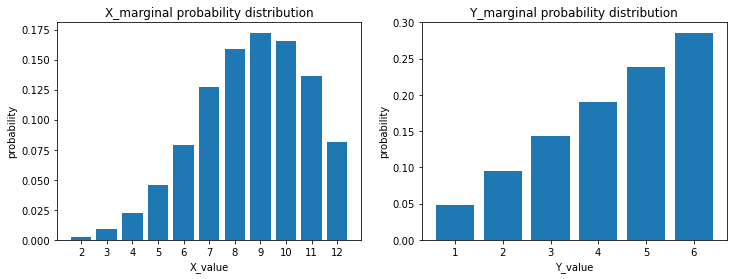

In [63]:
f, ax = plt.subplots(1,2, figsize=(12, 4))

ax[0].bar(x_set, prob_x)
ax[0].set_title('X_marginal probability distribution')
ax[0].set_xlabel('X_value')
ax[0].set_ylabel('probability')
ax[0].set_xticks(x_set)


ax[1].bar(y_set, prob_y)
ax[1].set_title('Y_marginal probability distribution')
ax[1].set_xlabel('Y_value')
ax[1].set_ylabel('probability')

plt.show()

---

## 2차원 이산형 확률변수 지표

 - 기대값, 분산 뿐만 아니라 공분산 및 상관계수라는 지표를 함께 정의할 수 있다.
 
### 1. 기대값

 - 구하는 방법은 1차원의 경우와 거의 동일하다.
 - 계산식
 $$\mu_x=E(X)=\sum_i\sum_jx_if_{XY}(x_i,y_j)$$

In [66]:
## 기대값 구현

np.sum(
    [
        x_i * f_XY(x_i, y_j)
        for x_i in x_set
        for y_j in y_set
    ]
)

8.667

### 1. 기대값의 일반화

 - 일반적인 g(X,Y)의 기대값을 정의하면 아래와 같다.
 $$E(g(X,Y))=\sum_i\sum_jg(x_i,y_j)f_{XY}(x_i,y_j)$$

In [67]:
## 기대값의 일반화 구현

def E(XY, g):
    x_set, y_set, f_XY = XY
    return np.sum(
        [
            g(x_i,y_j)*f_XY(x_i,y_j)
            for x_i in x_set
            for y_j in y_set
        ]
    )

In [68]:
mean_X = E(XY, lambda x, y: x)
mean_X

8.667

In [70]:
mean_Y = E(XY, lambda x, y: y)
mean_Y

4.333

### 1. 기대값의 선형성

 - a,b를 실수 X, Y를 확률변수라 하면,
 $$E(aX+bY)=aE(X)+bE(Y)$$
   가 성립한다

In [71]:
a, b = 2, 3

In [72]:
E(XY, lambda x, y: a*x + b*y)

30.333

In [73]:
a*mean_X + b*mean_Y

30.333

----

### 2. 분산

 - 1차원의 경우와 거의 동일하며 산식은 아래와 같다.
 $$\sigma_X^2=V(X)=\sum_i\sum_j(x_i-\mu_x)^2f_{XY}(x_i,y_j)$$

In [74]:
np.sum(
    [
        (x_i-E(XY,lambda x, y:x))**2*f_XY(x_i, y_j)
        for x_i in x_set
        for y_j in y_set
    ]
)

4.444

### 2. 분산의 일반화

 - X와 Y의 함수 g(X, Y)의 분산의 산식은 아래와 같다.
 
 $$V(g(X,Y))=\sum_i\sum_j(g(x_i,y_j)-E(g(X,Y))^2f_{XY}(x_i,y_j)$$

In [75]:
def V(XY, g):
    x_set, y_set, f_XY = XY
    return np.sum(
        [
            (g(x_i, y_j)-E(XY, g))**2*f_XY(x_i,y_j)
            for x_i in x_set
            for y_j in y_set
        ]
    )

In [85]:
var_X = V(XY, lambda x, y: x)

In [84]:
var_Y = V(XY, lambda x, y: y)

---

### 3. 공분산

 - 공분산 사용시 X, Y 사이에 어느 정도 상관이 있는지 알 수 있다.
 $$\sigma_{XY}=Cov(X,Y)=\sum_i\sum_j(x_i-\mu_X)(y_j-\mu_Y)f_{XY}(x_i,y_j)$$

In [78]:
## 공분산 구현

np.sum(
    [
        (x_i-mean_X)*(y_j-mean_Y)*f_XY(x_i,y_j)
        for x_i in x_set
        for y_j in y_set
    ]
)

2.222

In [79]:
def COV(XY):
    x_set, y_set, f_XY = XY
    mean_X = E(XY, lambda x,y: x)
    mean_Y = E(XY, lambda x,y: y)
    return np.sum(
        [
            (x_i-mean_X)*(y_j-mean_Y)*f_XY(x_i,y_j)
            for x_i in x_set
            for y_j in y_set
        ]
    )

In [83]:
cov_xy = COV(XY)

### 분산과 공분산의 공식

a,b를 실수 X, Y를 확률변수라 하면
$$V(aX+bY)=a^2V(X)+b^2V(Y)+2abCov(X,Y)$$
가 성립한다

In [81]:
V(XY, lambda x, y: 2*x + 3*y)

64.444

In [82]:
2**2*V(XY, lambda x,y: x) + 3**2*V(XY, lambda x,y: y) + 2*2*3*COV(XY)

64.444

### 4. 상관계수

 - 확률변수의 상관계수는 공분산을 각각의 표준편차로 나누어서 구한다.
   기호는 $\rho$(로우)를 사용한다
   
   $$\rho_{XY}=\rho(X,Y)=\sigma_{XY}/\sigma_X\sigma_Y$$

In [86]:
cov_xy/np.sqrt(var_X*var_Y)

0.707